In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats as ss

import healpy as hp

import pathlib

In [2]:
def binning(cls, lmin = 10, lmax = 3000, delta_ell = 30):
        bins = np.arange(lmin, lmax, delta_ell)
        ells = np.arange(len(cls))
        sums = ss.binned_statistic(ells, ells, statistic='sum', bins = bins)
        cl = ss.binned_statistic(ells, ells*cls, statistic='sum', bins = bins)
        cl = cl[0] / sums[0]
        ells = (bins[1:]+bins[:-1])/2.0
        return ells, cl

In [3]:
kappa_lmaxes = [3000]

In [4]:
versions = ['qe', 'bh']

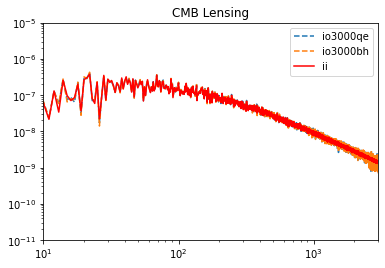

In [5]:
code = ''

plt.title('CMB Lensing')

for kappa_lmax in kappa_lmaxes:
    all_spectra = np.load(f'all_spectra_{kappa_lmax}.npy', allow_pickle = True)
    dd = all_spectra.item().get(code)
    for version in versions:
        d = dd[version]
        p = plt.loglog(d['io'], ls = '--', label = f'io{kappa_lmax}{version}')
        #plt.loglog(d['oo'], label = f'oo{kappa_lmax}{version}', color = p[0].get_color())

#plt.loglog(uxcls_bh_1, color = 'green')
#plt.loglog(uxcls_bh_2, color = 'yellow', ls = '--')
#plt.loglog(uxcls_bh_1, ls = '--', alpha = 0.4, color = 'orange')


#plt.loglog(uacls_nobh[0], color = 'green')
#plt.loglog(uacls_bh[0], ls = '--', alpha = 0.4, color = 'orange')

plt.loglog(d['ii'], label = 'ii', color = 'red')

plt.legend()
plt.xlim(10, 3e3)
plt.ylim(1e-11, 1e-5)
plt.show()

i is 2


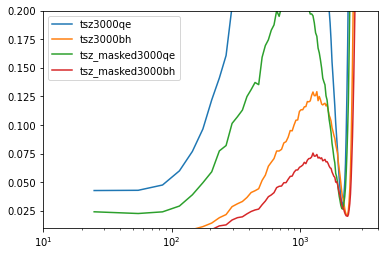

i is 4


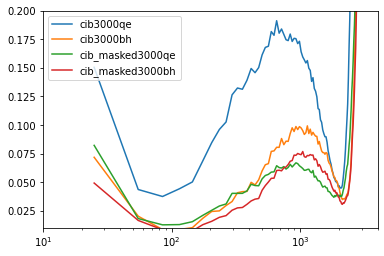

In [6]:
for kappa_lmax in kappa_lmaxes:

    all_spectra = np.load(f'all_spectra_{kappa_lmax}.npy', allow_pickle = True)

    codes = ['', 'tsz', 'tsz_masked', 'cib', 'cib_masked']

    i = 0
    for code in codes:
        if code != '':
            i += 1
        dd = all_spectra.item().get(code)
        for version in versions:
            d = dd[version]
            
            if code == '':
                base = d['ii']
                cmb = d['oo']
            else:
                ll, cc = binning(d['oo'])
                cc = cc/binning(base)[1]
                plt.plot(ll, cc, label = f'{code}{kappa_lmax}{version}')
                
        if (i % 2 == 0) and (i != 0):
            print('i is', i)
            plt.legend()
            plt.xlim(10, 4e3)
            plt.ylim(0.01, 0.2)
            plt.xscale('log')
            plt.show()

In [7]:
source_dir = pathlib.Path('/global/cscratch1/sd/omard/scatteringtfms/sims/')

In [8]:
getkappai = lambda version, lmax: hp.read_alm(source_dir/'kappa_alm.fits')
getkappar = lambda fg, version, lmax: np.load(source_dir/f'kappa_reconstructed_{version}{fg}_{lmax}.npy')
getkapparm = lambda fg, version, lmax: np.load(source_dir/f'kappa_reconstructed_{version}{fg}_masked_{lmax}.npy')

In [9]:
kappai = getkappai('', '')

In [10]:
clsi = hp.alm2cl(kappai)

/tmp/ipykernel_28289/4155904570.py:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 2000)


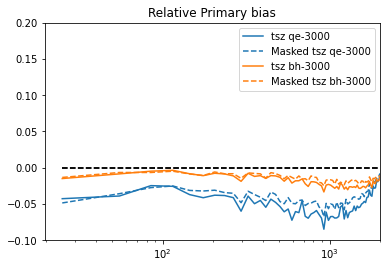

/tmp/ipykernel_28289/4155904570.py:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 2000)


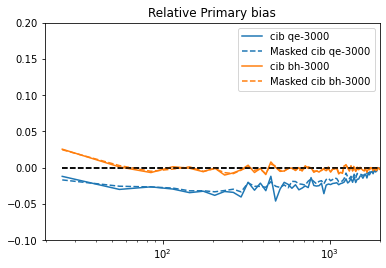

In [11]:
fgs = ['tsz', 'cib']

for lmax in kappa_lmaxes:
    for fg in fgs:
        plt.title('Relative Primary bias')
        for version in versions:
            
            kappar = getkappar(fg, version, lmax).astype(np.complex128)
            cls = hp.alm2cl(kappar, kappai.astype(np.complex128))

            ll, bnd = binning(cls)
            _, bndi = binning(clsi)

            p = plt.plot(ll, bnd/bndi, label = f'{fg} {version}-{lmax}')

            kappam = getkapparm(fg, version, lmax).astype(np.complex128)
            cls = hp.alm2cl(kappam, kappai.astype(np.complex128))

            ll, bnd = binning(cls)
            plt.plot(ll, bnd/bndi, label = f'Masked {fg} {version}-{lmax}', color = p[0].get_color(), ls = '--')

            plt.plot(ll, ll*0., ls = '--', color = 'black')

        plt.xscale('log')
        plt.legend()
        plt.ylim(-0.1, 0.2)
        plt.xlim(0, 2000)
        plt.show()

In [26]:
#counts = np.load(source_dir/'counts.npy')
#counts_alm = hp.map2alm(counts, lmax = 7000)
#np.save(source_dir/'counts_alm', counts_alm)

In [14]:
counts_alm = np.load(source_dir/'counts_alm.npy')

In [15]:
clsig = hp.alm2cl(kappai, counts_alm)

/tmp/ipykernel_28289/2556044742.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 2000)


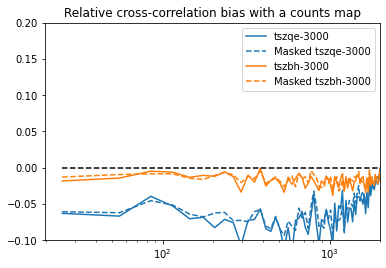

/tmp/ipykernel_28289/2556044742.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 2000)


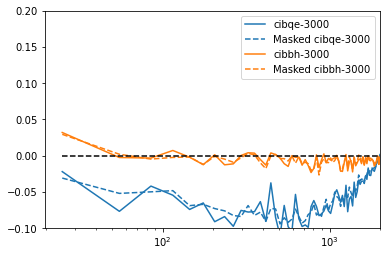

In [16]:
for lmax in kappa_lmaxes:
    plt.title('Relative cross-correlation bias with a counts map')
    for fg in fgs:
        for version in versions:
            kappar = getkappar(fg, version, lmax).astype(np.complex128)
            cls = hp.alm2cl(kappar, counts_alm.astype(np.complex128))
            ll, bnd = binning(cls)
            _, bndi = binning(clsig)
            p = plt.plot(ll, bnd/bndi, label = f'{fg}{version}-{lmax}')

            kappam = getkapparm(fg, version, lmax).astype(np.complex128)
            cls = hp.alm2cl(kappam, counts_alm.astype(np.complex128))

            ll, bnd = binning(cls)
            _, bndi = binning(clsig)
            plt.plot(ll, bnd/bndi, label = f'Masked {fg}{version}-{lmax}', color = p[0].get_color(), ls = '--')

        plt.plot(ll, ll*0., ls = '--', color = 'black')
        plt.xscale('log')
        plt.legend()
        plt.ylim(-0.1, 0.2)
        plt.xlim(0, 2000)
        plt.show()